In [1]:
from datetime import date
import agileplanner as ap

In [18]:
class HolidayScheduleForTesting(ap.HolidaySchedulePort):
    """HolidaySchedulePort implementation for testing."""
    # overriding abstract method
    holidays=[
        date(2023,12,25)
    ]
    def falls_on_holiday(self,some_date: date,location: str) -> bool:
        if some_date in HolidayScheduleForTesting.holidays:
            return True
        return False

holiday_schedule = HolidayScheduleForTesting()

In [19]:
q2 = ap.TimePeriod(
    name='Q2',
    start_date=date(2023,10,25),
    end_date=date(2024,1,23)
)

In [20]:
features = ap.Features('lotsoffeatures.yaml')
features.load_from_yaml_file()

In [21]:
team_of_one = ap.Team('One Man Band', 'teamofone.yaml').load_from_yaml_file()

In [22]:
team_capacity_q2 = ap.generate_capacity_sheet_for_team(team_of_one, q2, holiday_schedule)   

In [23]:
df = team_capacity_q2.get_df()

In [24]:
df


,Team,Person,Location,Start Date,End Date,Front End,Back End,QE,Documentation,DevOps,...,2024-01-15,2024-01-16,2024-01-17,2024-01-18,2024-01-19,2024-01-20,2024-01-21,2024-01-22,2024-01-23,Total
0,One Man Band,Brian Hofmeister,US,2023-01-01,2030-12-31,T,F,F,F,F,...,1.0,1.0,1.0,1.0,1.0,0,0,1.0,1.0,64.0
1,One Man Band,Total,-,-,-,-,-,-,-,-,...,1.0,1.0,1.0,1.0,1.0,0,0,1.0,1.0,64.0


In [25]:
scheduler = ap.TeamScheduler(team_capacity_q2,features.get_epics())
schedule_results = scheduler.build_schedule()

In [26]:
for schedule_result in schedule_results:
    print(schedule_result)

CSESC-1 1 EpicType.FRONTEND EpicScheduleStatus.OK: starts 2023-10-25 and ends 2023-10-25 with 0 remaining
CSESC-2 1 EpicType.FRONTEND EpicScheduleStatus.OK: starts 2023-10-26 and ends 2023-10-26 with 0 remaining
CSESC-3 1 EpicType.FRONTEND EpicScheduleStatus.OK: starts 2023-10-27 and ends 2023-10-27 with 0 remaining
CSESC-4 1 EpicType.FRONTEND EpicScheduleStatus.OK: starts 2023-10-30 and ends 2023-10-30 with 0 remaining
CSESC-5 1 EpicType.FRONTEND EpicScheduleStatus.OK: starts 2023-10-31 and ends 2023-10-31 with 0 remaining
CSESC-6 1 EpicType.FRONTEND EpicScheduleStatus.OK: starts 2023-11-01 and ends 2023-11-01 with 0 remaining
CSESC-7 1 EpicType.FRONTEND EpicScheduleStatus.OK: starts 2023-11-02 and ends 2023-11-02 with 0 remaining
CSESC-8 1 EpicType.FRONTEND EpicScheduleStatus.OK: starts 2023-11-03 and ends 2023-11-03 with 0 remaining
CSESC-9 1 EpicType.FRONTEND EpicScheduleStatus.OK: starts 2023-11-06 and ends 2023-11-06 with 0 remaining
CSESC-10 1 EpicType.FRONTEND EpicScheduleStatu

In [27]:
epic_series = [schedule_result.epic_key for schedule_result in schedule_results if schedule_result.epic_schedule_status == ap.EpicScheduleStatus.OK]
start_dates_series = [date.fromisoformat(schedule_result.start_date) for schedule_result in schedule_results if schedule_result.epic_schedule_status == ap.EpicScheduleStatus.OK]
end_dates_series = [date.fromisoformat(schedule_result.end_date) for schedule_result in schedule_results if schedule_result.epic_schedule_status == ap.EpicScheduleStatus.OK]

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
schedule_df = pd.DataFrame(data={"Epic": epic_series, "Start": start_dates_series, "End": end_dates_series})

In [36]:
schedule_df["Days"] = schedule_df["End"] - schedule_df["Start"]
schedule_df["Days"] = schedule_df["Days"] + timedelta(days=1)

In [37]:
len(schedule_df)

50

In [38]:
schedule_df

,Epic,Start,End,Days
0,CSESC-1,2023-10-25,2023-10-25,1 days 00:00:00
1,CSESC-2,2023-10-26,2023-10-26,1 days 00:00:00
2,CSESC-3,2023-10-27,2023-10-27,1 days 00:00:00
3,CSESC-4,2023-10-30,2023-10-30,1 days 00:00:00
4,CSESC-5,2023-10-31,2023-10-31,1 days 00:00:00
5,CSESC-6,2023-11-01,2023-11-01,1 days 00:00:00
6,CSESC-7,2023-11-02,2023-11-02,1 days 00:00:00
7,CSESC-8,2023-11-03,2023-11-03,1 days 00:00:00
8,CSESC-9,2023-11-06,2023-11-06,1 days 00:00:00
9,CSESC-10,2023-11-07,2023-11-07,1 days 00:00:00


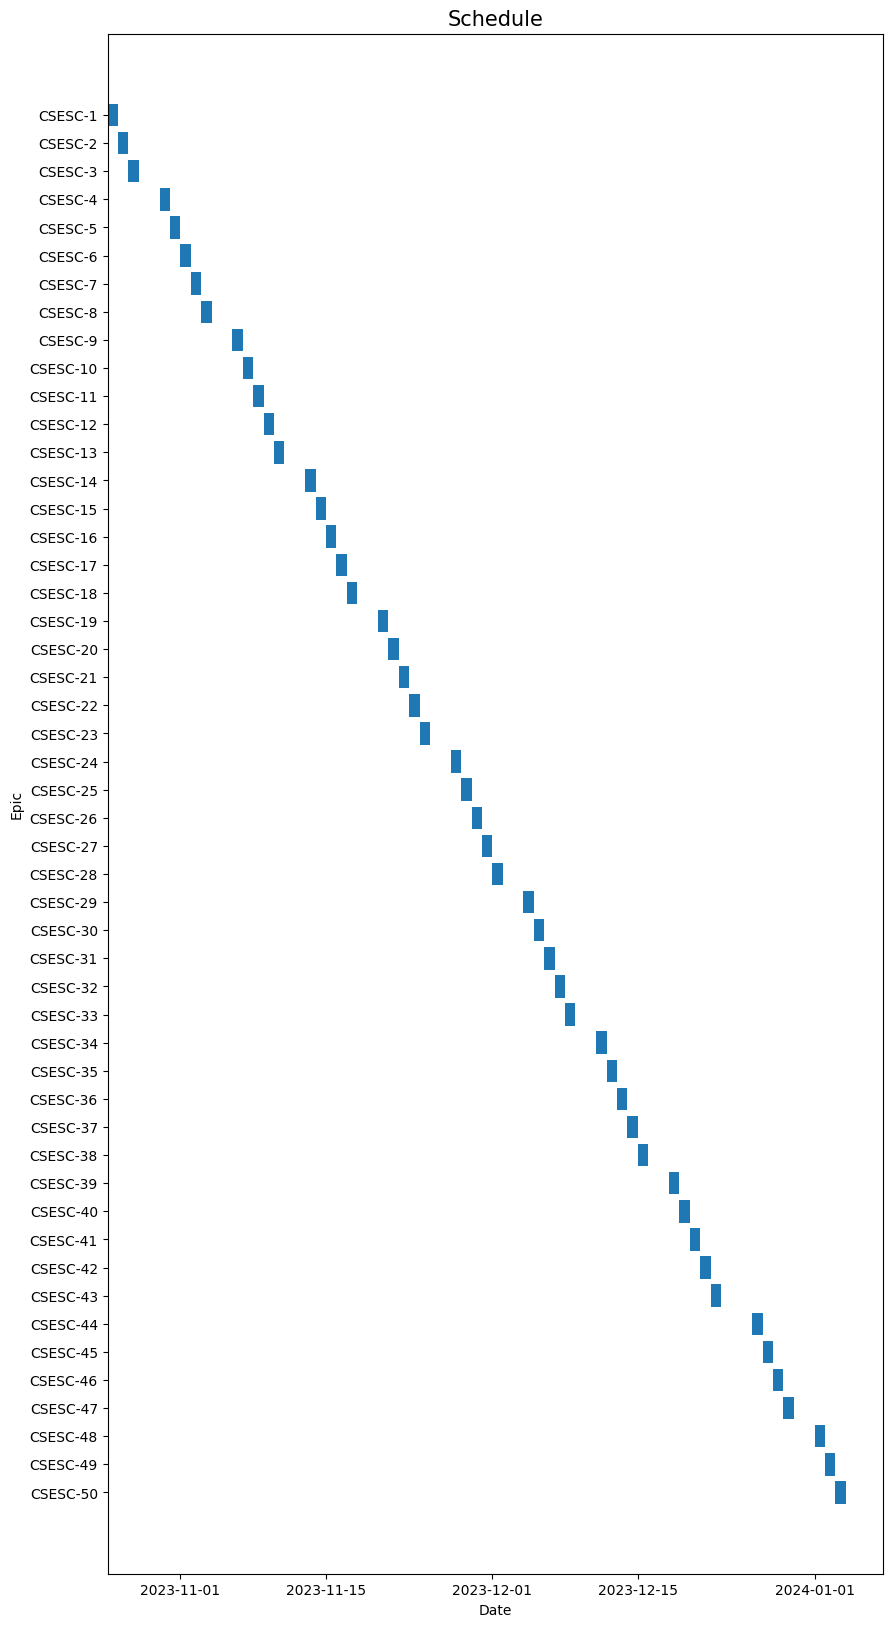

In [45]:
fig = plt.figure(figsize=(10,20))
plt.barh(y=schedule_df['Epic'], width=schedule_df['Days'], left=schedule_df['Start'])
plt.title('Schedule', fontsize=15)
plt.gca().invert_yaxis()
plt.xlabel("Date")
plt.ylabel("Epic")
plt.show()